In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('disease_prediction\Training.csv')

In [3]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
columns=list(data.columns.values)

In [8]:

diseases=list(data['prognosis'].unique())


In [11]:
mapping={}
for i,dis in enumerate(diseases):
    mapping[dis]=i
    

In [20]:
data['prognosis']=data['prognosis'].map(mapping)

In [22]:
itch=data['itching'].value_counts().reset_index()

In [37]:
#data.set_index('prognosis').T.plot(kind='bar', stacked=True)

In [23]:
itch.iplot(kind='bar',x='index')

In [24]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X=np.array(data.iloc[:,:-1])

In [26]:
y=np.array(data.iloc[:,-1])[:,np.newaxis]

In [27]:
print(X.shape,y.shape)

(4920, 132) (4920, 1)


In [60]:
m=len(y)
k=41
ones=np.ones([m,1])
X=np.hstack([ones,X])

In [62]:
m,n=X.shape
print(X.shape,y.shape)

(4920, 133) (4920, 1)


In [63]:
theta=np.zeros([k,n])

In [66]:
print(theta.shape,X.shape,y.shape)

(41, 133) (4920, 133) (4920, 1)


In [67]:
def sigmoid(X):
    return 1/1+np.exp(-X)

In [105]:
def costfunction(theta,X,y,lmbda):
    temp=np.dot(y.T,np.log(sigmoid(np.dot(X,theta))))+np.dot((1-y).T,np.log(1-sigmoid(np.dot(X,theta))))
    return (temp/(-m))+np.sum(theta[1:]**2)*((lmbda)/(2*m))

In [106]:
def gradient(theta,X,y,lmbda):
    temp=sigmoid(np.dot(X,theta))-y
    temp=(np.dot(X.T,temp)/m)+theta * lmbda / m
    temp[0]=temp[0]-theta[0] * lmbda / m
    return temp

In [108]:
import scipy.optimize as opt
lmbda =1001
k=41
theta=np.zeros((k,n))

for i in range(k):
    digit_class=i 
    theta[i]=opt.fmin_cg(f=costfunction,x0=theta[i],fprime=gradient,args=(X,(y==digit_class).flatten(),lmbda),maxiter=50)

Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluatio

In [151]:
theta=np.zeros((k,n))
costfunction(theta[0],X,y==0,100000000000000000)

array([nan])

In [116]:
X=(X-np.mean(X))/(np.std(X))

In [126]:
y.T@np.log(sigmoid(np.dot(X,theta[0])))

array([68205.6825671])

In [150]:
sigmoid(np.dot(X,theta[0]))

array([2., 2., 2., ..., 2., 2., 2.])

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [59]:
# data exploration section
data['Noofdiseases']=data.iloc[:,:-1].sum(axis=1)
output=data['prognosis'].value_counts().sort_values().reset_index()

In [72]:
output.iplot(kind='pie',labels='index',values='prognosis',pull=0.05)

In [69]:
data['itching'].value_counts().reset_index().iplot(kind='pie',labels='index',values='itching',pull=0.05,hole=0.1)

In [136]:
data['itching'].value_counts().reset_index().iplot(kind='pie',labels='index',values='itching',pull=0.05,hole=0.1)

In [138]:
lis=[]
for i,each in enumerate(data.columns.values):
    df=data[each].value_counts().reset_index()
    lis.append(df)

In [154]:
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,on='index'), lis)
df_final.loc[1]=1


for i in range(len(lis)):
    df_final.loc[1][i]=4920-df_final.loc[0][i]
    
df_final.drop(['prognosis'],axis=1,inplace=True)
df_final['index'][1]=1

In [178]:
disyes=df_final.loc[1].reset_index().sort_values([1],ascending=False)

In [184]:
disyes.iplot(kind='bar',x='index',y=1)

In [205]:
disyes[:20].iplot(kind='bar',x='index')

In [206]:
disyes[:20].iplot(kind='pie',labels='index',values=1)

In [223]:
disyes[110:].iplot(kind='pie',labels='index',values=1,hole=0.1,pull=0.1)

In [ ]:
disyes[110:].iplot(kind='pie',labels='index',values=1,hole=0.1,pull=0.1)

In [326]:
data['Noofdiseases'].reset_index().sort_values(['Noofdiseases'],ascending=False).drop_duplicates('Noofdiseases').\
iplot(kind='pie',labels='index',values='Noofdiseases')


In [331]:
data['Noofdiseases'].reset_index().sort_values(['Noofdiseases'],ascending=False).drop_duplicates('Noofdiseases')\
.sort_values(['Noofdiseases'],ascending=False).iplot(kind='bar',x='index',y='Noofdiseases')

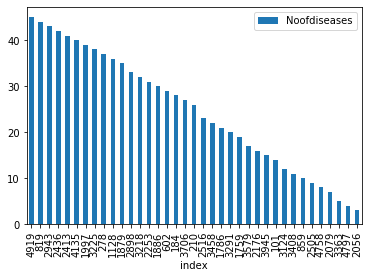

In [337]:
data['Noofdiseases'].reset_index().sort_values(['Noofdiseases'],ascending=False).drop_duplicates('Noofdiseases').plot(kind='bar',x='index')

In [339]:
data['Noofdiseases'].reset_index().sort_values(['Noofdiseases'],ascending=False).drop_duplicates('Noofdiseases').\
iplot(kind='pie',labels='index',values='Noofdiseases')